### KMeans

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from matplotlib import cm
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/Example1.csv',sep='\t')
df.head(5)

,A,B
0,6.371097,0.982594
1,-3.472607,2.005099
2,-0.316587,4.570838
3,6.336829,-0.284369
4,-1.227194,7.934914


In [3]:
# clusters
n_clus = 3
km = KMeans(n_clusters=n_clus, n_init=50, tol=1e-10, random_state=1234).fit(df)

In [4]:
centers = km.cluster_centers_
centers

array([[ 0.17731668,  8.05606575],
       [ 7.69052045, -0.99142574],
       [ 0.38313488,  2.49454399]])

In [5]:
labels = km.predict(df)
labels

array([1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 1,
       1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0,
       2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2,
       2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1,
       0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1,
       2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2,
       0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1,

In [6]:
# Add labels column to current data frame
df['Label'] = labels
df.head(5)

,A,B,Label
0,6.371097,0.982594,1
1,-3.472607,2.005099,2
2,-0.316587,4.570838,2
3,6.336829,-0.284369,1
4,-1.227194,7.934914,0


In [10]:
groups = df.groupby('Label')

In [31]:
sum_of_squares = 0

for name, group in groups:
    arr = np.array(group)[:,:2]
    for x in arr:
        sum_of_squares += np.sum((x-centers[name])**2)
        

In [32]:
# Computation is just being shown????
inertia = km.inertia_
inertia, sum_of_squares

(2784.06823408584, 2784.068234085838)

### Visualization Part

In [10]:
# Assign colors based on how many clusters
colors = cm.coolwarm(np.array(labels).astype(float) / n_clus)
colors

array([[0.66725292, 0.77917646, 0.99295921, 1.        ],
       [0.9682034 , 0.7208441 , 0.61229299, 1.        ],
       [0.9682034 , 0.7208441 , 0.61229299, 1.        ],
       ...,
       [0.9682034 , 0.7208441 , 0.61229299, 1.        ],
       [0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.66725292, 0.77917646, 0.99295921, 1.        ]])

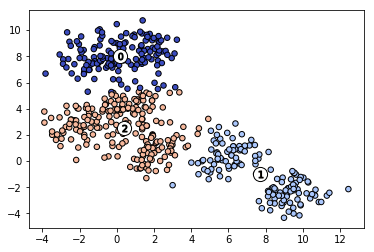

In [11]:
fig, ax = plt.subplots()
ax.scatter(df['A'],df['B'], marker='o', s=30, c=colors, edgecolor='k')
ax.scatter(centers[:,0], centers[:,1], marker='o', c='white', s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax.scatter(c[0], c[1], marker='$%d$'%i, s=50, edgecolor='k')
plt.show()

In [13]:
# Just showing example for different values of clusters
for n_clus in range(2, 21):
    labels = KMeans(n_clusters=n_clus, n_init=50, tol=1e-10, random_state=1234).fit_predict(df)
    avg = silhouette_score(df, labels)
    print(f'For k={n_clus}, the score is {avg}')

For k=2, the score is 0.523646624712589
For k=3, the score is 0.5389739230358216
For k=4, the score is 0.5022786652229396
For k=5, the score is 0.512795189209412
For k=6, the score is 0.5138504906514931
For k=7, the score is 0.4930135308266141
For k=8, the score is 0.46769041090376334
For k=9, the score is 0.44939361137345224
For k=10, the score is 0.4452803356954857
For k=11, the score is 0.42050521129135504
For k=12, the score is 0.4114817661719793
For k=13, the score is 0.35553429215120813
For k=14, the score is 0.35745331101422106
For k=15, the score is 0.3659424937068108
For k=16, the score is 0.35971418448622455
For k=17, the score is 0.36342460401869586
For k=18, the score is 0.3703180971876268
For k=19, the score is 0.375426698271725
For k=20, the score is 0.3691907095057153


### PCA

In [15]:
df3 = pd.read_csv('../data/Example3.csv',sep='\t')
df3.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [19]:
pca = PCA(n_components=2).fit(df3)
x_new = pca.transform(df3)
df3.shape
x_new.shape

(1797, 2)